**Модель YOLO для обнаружения объектов на изображениях**

# А. Использование предобученной модели

In [ ]:
%pip install ultralytics

  Using cached ultralytics-8.3.74-py3-none-any.whl.metadata (35 kB)
  Using cached ultralytics_thop-2.0.14-py3-none-any.whl.metadata (9.4 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.2.1.3-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.5.147-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.6.1.9-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.3.1.170-py3-none-manylinux2014_x86_64.whl.m

In [ ]:
import ultralytics

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
from ultralytics import YOLO

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
model = YOLO("yolo11n.pt") # загружаем предобученную модель yolo 11 версии

100%|██████████| 5.35M/5.35M [00:00<00:00, 271MB/s]


In [ ]:
results = model('/content/drive/MyDrive/картинка.jpg') # выполняем предсказание объектов на изображении


image 1/1 /content/drive/MyDrive/картинка.jpg: 352x640 1 cat, 1 dog, 53.6ms
Speed: 13.4ms preprocess, 53.6ms inference, 307.7ms postprocess per image at shape (1, 3, 352, 640)


Обнаружены: один кот и одна собака

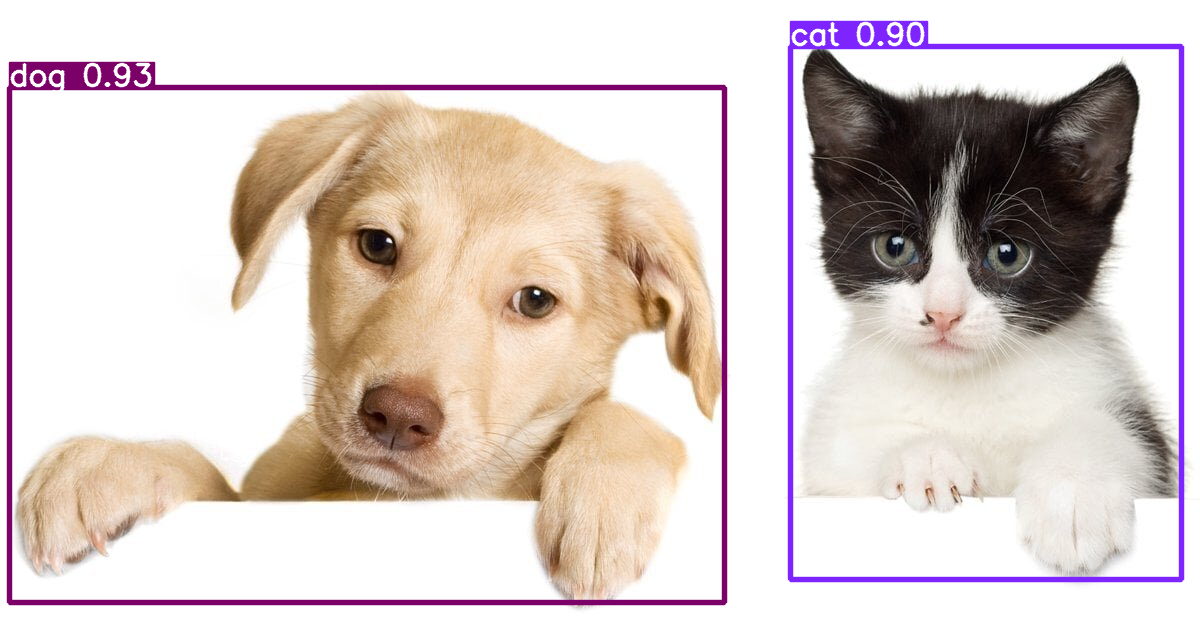

In [ ]:
result=results[0]
result.show() # отображаем изображение с рамками

In [ ]:
# Извлекаем информацию о предсказаниях
classes = result.boxes.cls.cpu().numpy()       # id классов
confidences = result.boxes.conf.cpu().numpy()  # уверенность
bboxes = result.boxes.xyxy.cpu().numpy()       # коррдинаты углов рамок

for i in range(len(classes)):
    print("\nОбнаруженный объект", i + 1)
    print("- Класс:", model.names[classes[i]])
    print("- Левый верхний угол: {:.2f}, {:.2f}".format(bboxes[i][0], bboxes[i][1]))
    print("- Правый нижний угол: {:.2f}, {:.2f}".format(bboxes[i][2], bboxes[i][3]))
    print("- Уверенность:", round(confidences[i] * 100, 2), "%")


Обнаруженный объект 1
- Класс: dog
- Левый верхний угол: 9.80, 87.66
- Правый нижний угол: 724.96, 602.19
- Уверенность: 93.44 %

Обнаруженный объект 2
- Класс: cat
- Левый верхний угол: 790.65, 46.26
- Правый нижний угол: 1181.92, 579.75
- Уверенность: 89.51 %


# B. Подготовьте свой набор изображений железнодорожных вагонов, выполнив разметку с помощью Roboflow.

Вместе с Коневым Виктором и Ясыревым Михаилом размечали 209 картинок из исходного набора изображений. https://universe.roboflow.com/wagons-7juqb/wagons-xk0cl

#C. Обучите модель YOLO обнаруживать аннотированные части у вагонов в полученном наборе данных.#

In [ ]:
!pip install roboflow

In [ ]:
# Инициализация соединения с платформой Roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="Xj4amX4Ant0GTxlSZurb")
project = rf.workspace("cv-390lk").project("test-0kyke") # получаем доступ к проекту
version = project.version(2)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to test-2 in yolov11:: 100%|██████████| 4786/4786 [00:01<00:00, 4231.01it/s]


In [ ]:
from ultralytics import YOLO
model = YOLO('yolo11n.pt') # загружаем модель из файла

In [ ]:
# Обучаем модель на данных data.yaml, на GPU
model.train(data='/content/test-2/data.yaml', epochs=20, device=0)

Ultralytics 8.3.74 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/test-2/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=Tru

100%|██████████| 755k/755k [00:00<00:00, 104MB/s]


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/test-2/train/labels... 2093 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2093/2093 [00:01<00:00, 1971.40it/s]

train: New cache created: /content/test-2/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 5890, len(boxes) = 9419. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: '2.0.4' (you have '2.0.3'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/test-2/valid/labels... 196 images, 0 backgrounds, 0 corrupt: 100%|██████████| 196/196 [00:00<00:00, 1394.97it/s]

val: New cache created: /content/test-2/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 564, len(boxes) = 901. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.51G      1.534      2.338      1.661        118        640: 100%|██████████| 131/131 [00:45<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.17it/s]

                   all        196        901      0.728      0.333      0.359      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20       2.5G      1.515      1.819      1.623        104        640: 100%|██████████| 131/131 [00:41<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.19it/s]


                   all        196        901      0.384      0.363        0.3      0.152

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.45G      1.496      1.707      1.595        115        640: 100%|██████████| 131/131 [00:41<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.89it/s]

                   all        196        901      0.468      0.325      0.286      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.46G      1.469      1.631      1.582        102        640: 100%|██████████| 131/131 [00:41<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.57it/s]

                   all        196        901      0.415      0.457      0.385      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.43G      1.424      1.533      1.541        122        640: 100%|██████████| 131/131 [00:43<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.76it/s]

                   all        196        901      0.395      0.505      0.415       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20       2.5G      1.401      1.494      1.529        110        640: 100%|██████████| 131/131 [00:41<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.79it/s]

                   all        196        901      0.408      0.524      0.447      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.43G      1.358      1.437      1.495         82        640: 100%|██████████| 131/131 [00:41<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.64it/s]


                   all        196        901      0.462      0.485      0.433      0.248

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.43G      1.332      1.397      1.472         98        640: 100%|██████████| 131/131 [00:41<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.74it/s]


                   all        196        901      0.516      0.502      0.478       0.29

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.45G       1.31      1.352      1.446        141        640: 100%|██████████| 131/131 [00:40<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.54it/s]

                   all        196        901      0.454      0.515      0.467      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.51G      1.282       1.32      1.434         92        640: 100%|██████████| 131/131 [00:40<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.47it/s]

                   all        196        901      0.466      0.548      0.482      0.295


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.55G      1.296      1.287      1.477         53        640: 100%|██████████| 131/131 [00:42<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.94it/s]


                   all        196        901      0.528      0.497      0.485      0.287

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.39G      1.258       1.22      1.458         55        640: 100%|██████████| 131/131 [00:41<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.00it/s]

                   all        196        901      0.489      0.513      0.473      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.39G      1.225      1.175      1.425         41        640: 100%|██████████| 131/131 [00:39<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.89it/s]

                   all        196        901      0.491      0.531      0.488      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.42G      1.196      1.128      1.403         52        640: 100%|██████████| 131/131 [00:39<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.27it/s]

                   all        196        901      0.518      0.496      0.489      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.39G      1.164      1.093      1.383         51        640: 100%|██████████| 131/131 [00:39<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.97it/s]

                   all        196        901      0.486      0.501      0.473      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      2.39G      1.132      1.057      1.349         63        640: 100%|██████████| 131/131 [00:40<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.76it/s]

                   all        196        901       0.46      0.498      0.461      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      2.39G      1.103      1.017      1.339         47        640: 100%|██████████| 131/131 [00:39<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.84it/s]

                   all        196        901      0.512      0.508      0.479      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      2.37G      1.071      0.975      1.311         53        640: 100%|██████████| 131/131 [00:39<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.74it/s]

                   all        196        901       0.52        0.5      0.476       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      2.37G      1.049     0.9388      1.298         56        640: 100%|██████████| 131/131 [00:40<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.90it/s]

                   all        196        901      0.513        0.5      0.477      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      2.39G      1.027     0.9126      1.281         46        640: 100%|██████████| 131/131 [00:40<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.76it/s]

                   all        196        901      0.504      0.519      0.474      0.307



20 epochs completed in 0.247 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.74 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 238 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]


                   all        196        901      0.516      0.504      0.488      0.312
                  body        194        324      0.644       0.88      0.853      0.612
              coupling         92        110      0.436      0.109      0.187     0.0971
                wheels        194        467      0.467      0.522      0.426      0.226
Speed: 0.2ms preprocess, 3.5ms inference, 0.0ms loss, 4.4ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x782a7158a5d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

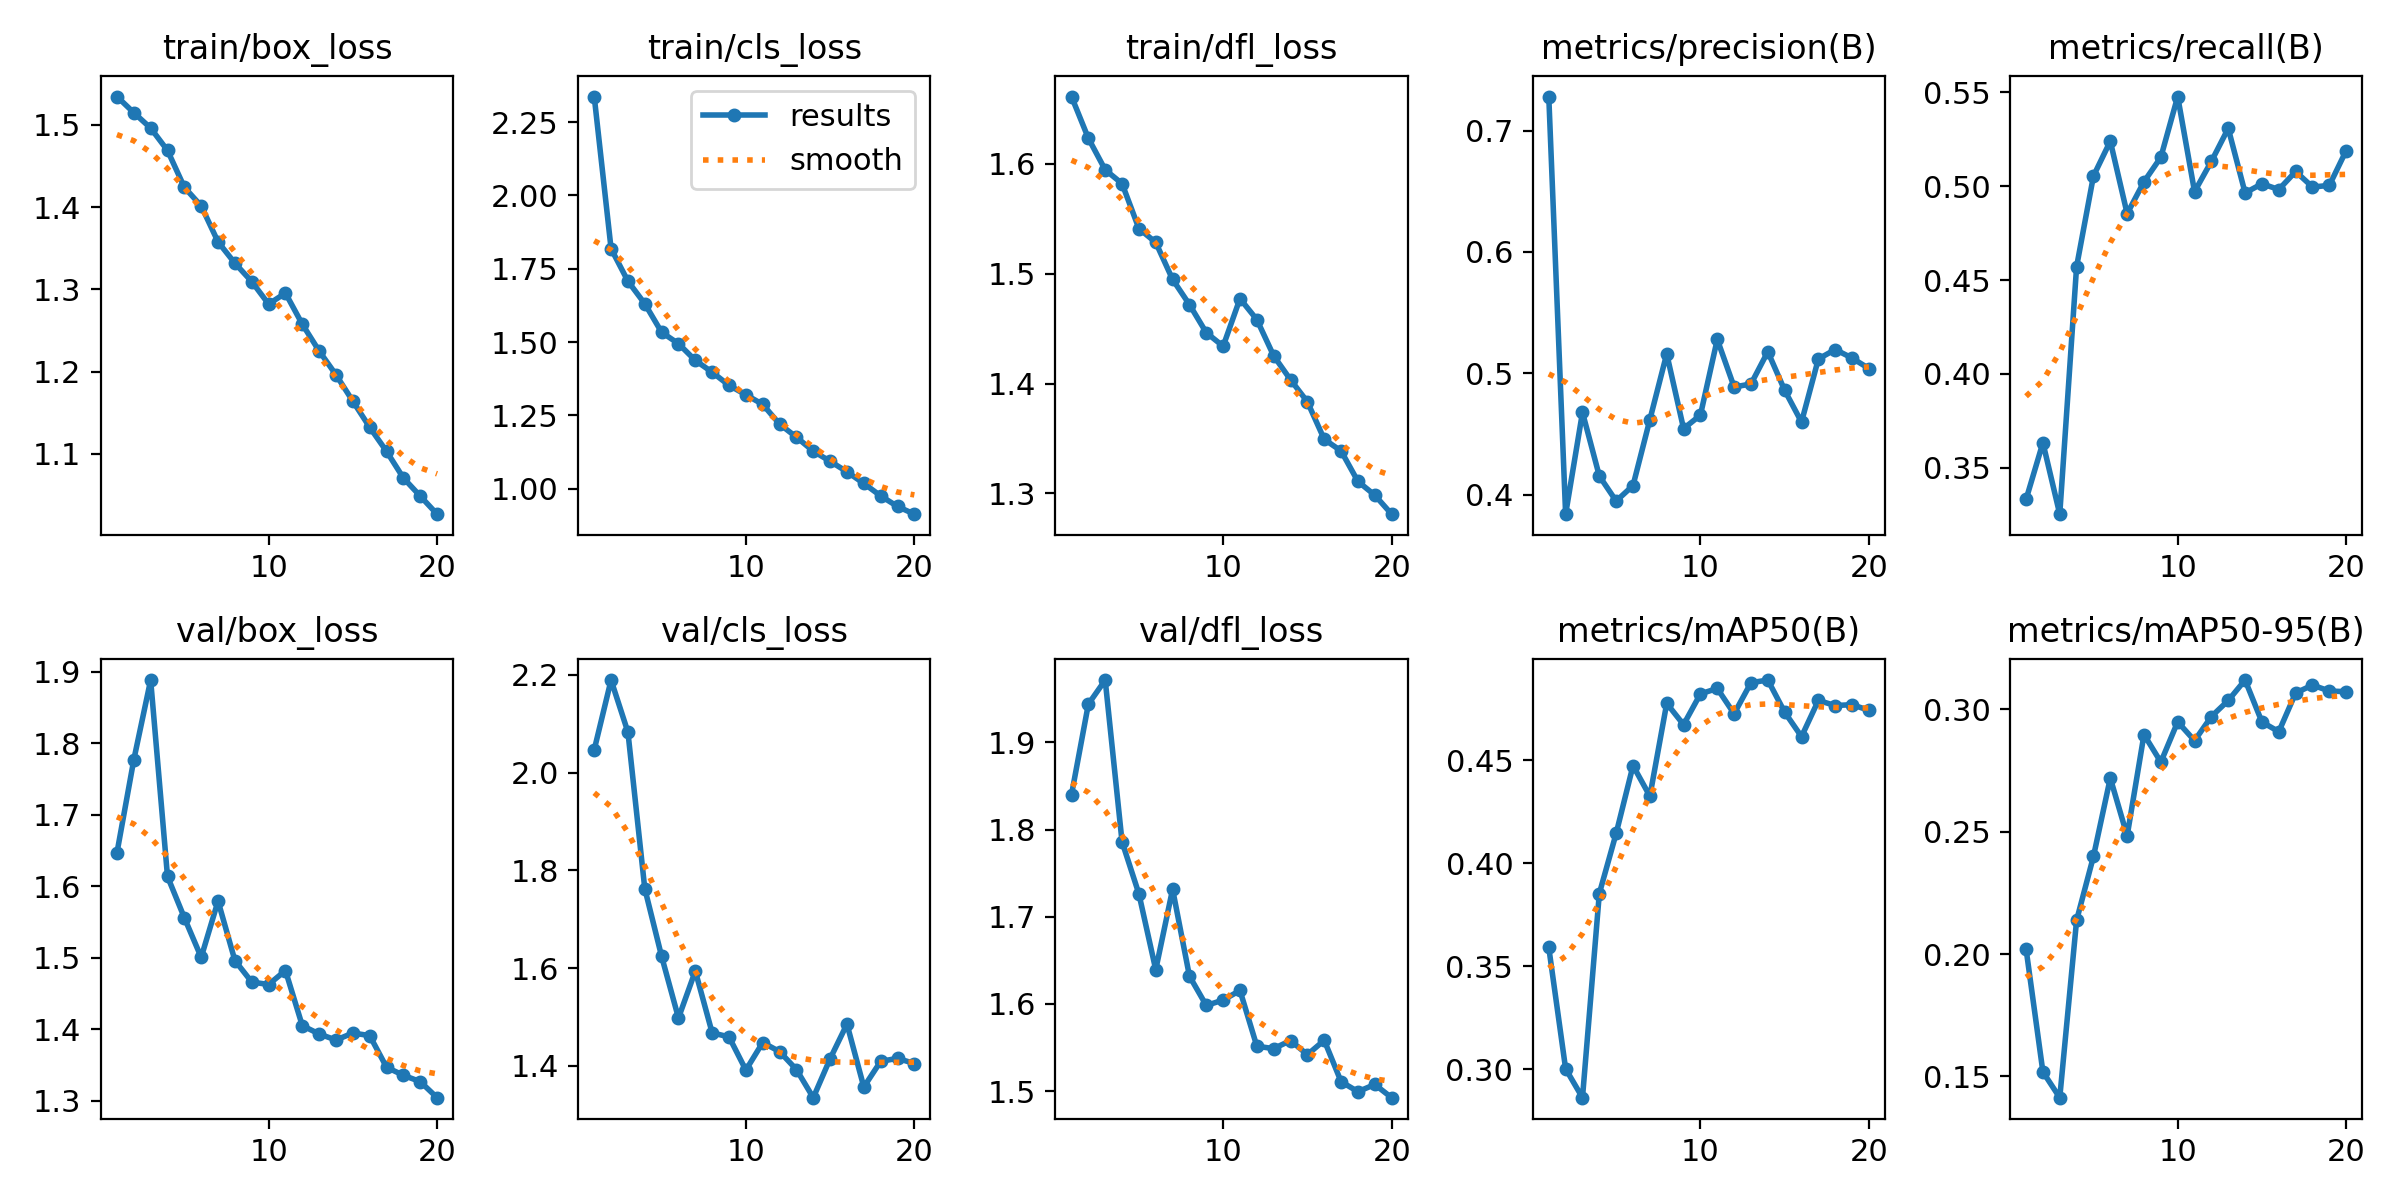

In [ ]:
from IPython.display import Image
# Отображаем график результатов
Image("/content/runs/detect/train/results.png", width=1000, height=700)

Вывод: точность растет, потери снижаются как на обучающей, так и на валидационной выборке.

In [ ]:
# Загружаем лучшую модель и отображаем её путь
best_model = YOLO("/content/runs/detect/train/weights/best.pt")


0: 640x640 1 body, 1 wheels, 15.6ms
1: 640x640 2 bodys, 1 coupling, 1 wheels, 15.6ms
2: 640x640 1 body, 2 couplings, 3 wheelss, 15.6ms
3: 640x640 1 body, 3 wheelss, 15.6ms
4: 640x640 3 bodys, 6 wheelss, 15.6ms
Speed: 3.8ms preprocess, 15.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


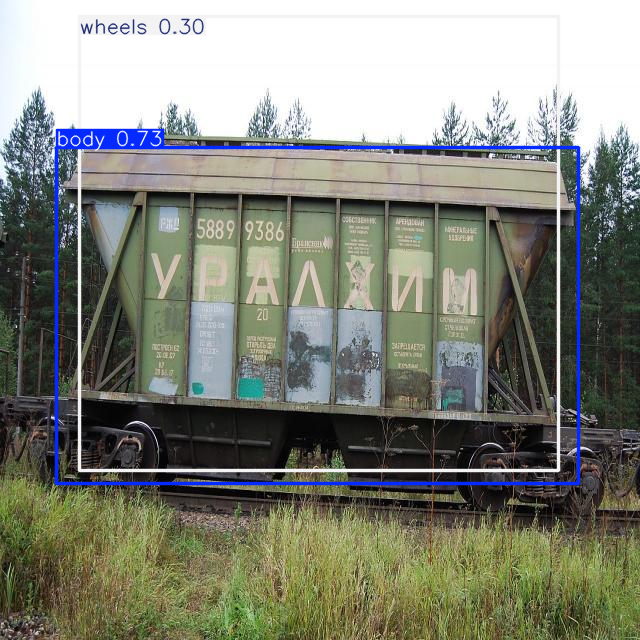

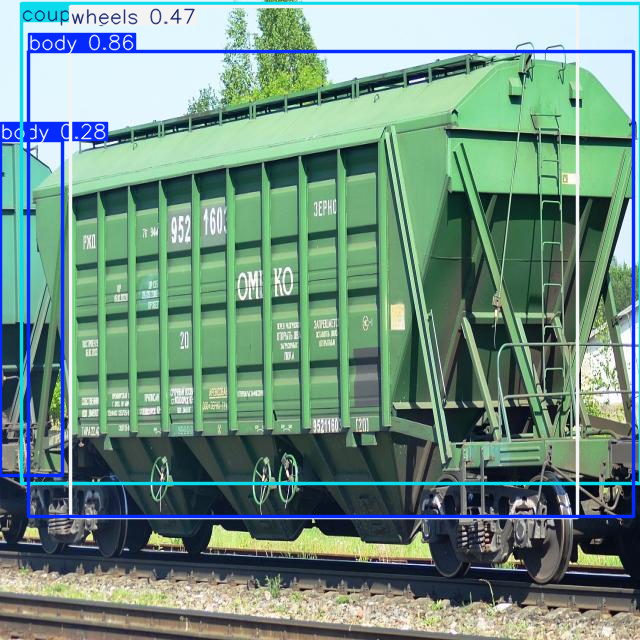

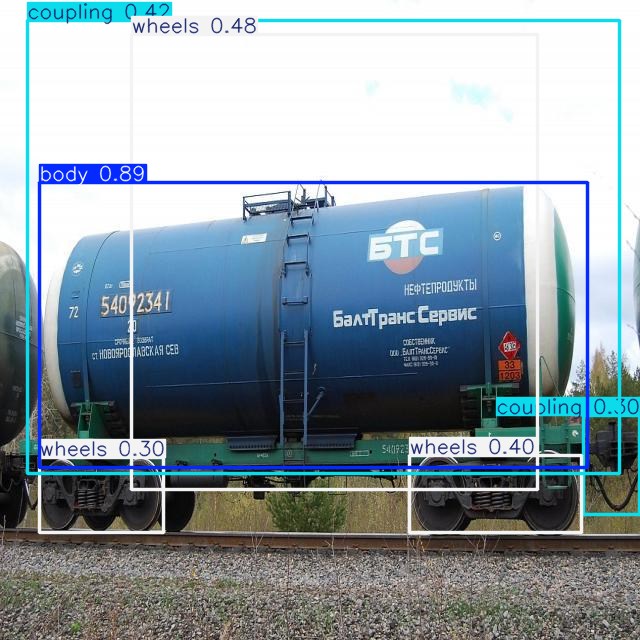

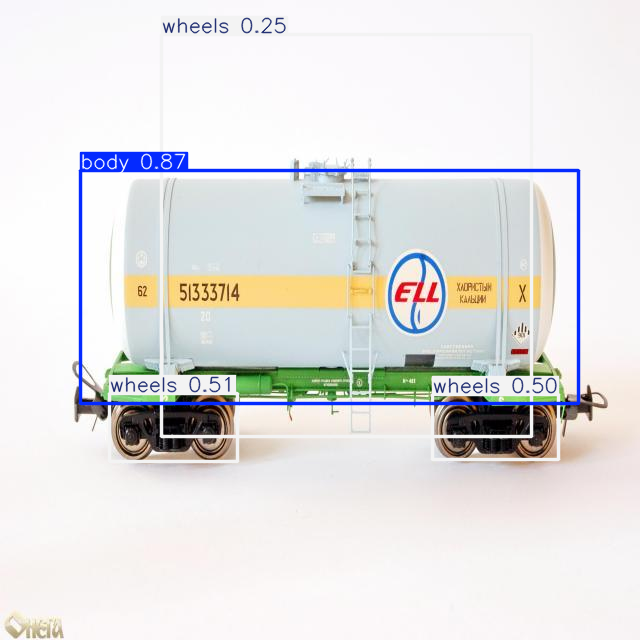

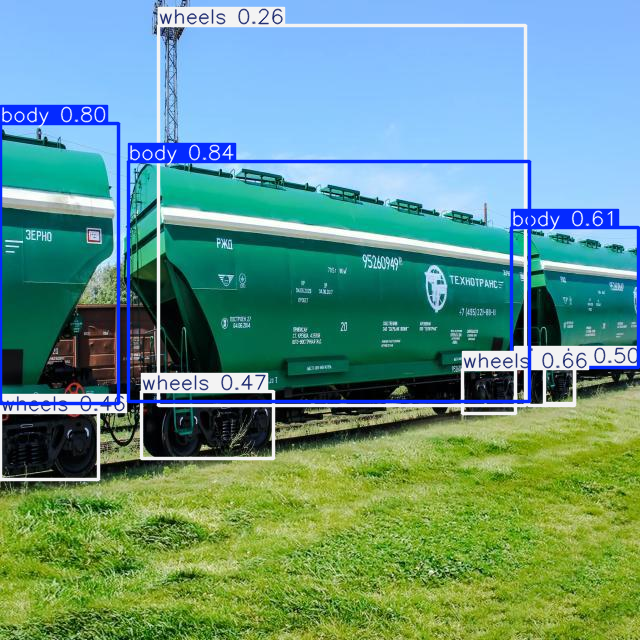

In [ ]:
import random
import os

# Путь к папке с изображениями
folder_path = '/content/test-2/test/images/'

# Выбираем 5 случайных изображений
random_image_paths = random.sample(os.listdir(folder_path), 5)

# Выполнение предсказания и отображение результатов
results = model([os.path.join(folder_path, img) for img in random_image_paths])
for result in results:
    result.show()